## Imports

In [1]:
# Import modules for working with excel sheets and for plotting

# matplotlib: module for plotting
# pandas: module for working with dataframe (can be imported from excel, csv, txt)
# %: ipython magic, to plot graphs in line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

## Load Data

The following dataset is NOT on GitHub. Make sure your local directory structure is as follows:

                    repository_directory
                     /        \        \
                    /          \        \
                  code        assets    other files (.gitignore, README.md, LICENSE.txt, ...)
                   /            \
                  /              \
    <jupyter_notebook_file>    <data_file>
    
Also, if you want to use the functions in this script with another dataset, make sure to change `number_of_rows` 
and the file name in the following import statements.

In [2]:
# Import excel file as a `pandas.ExcelFile' object (which basically has all sub-sheets in a big container!)
# also, only import 1302 rows
ca_data1 = pd.ExcelFile('../assets/to_combine/data_before_nov.xlsx')
ca_data2 = pd.ExcelFile('../assets/to_combine/data_after_nov.xlsx')

In [6]:
ca_data_11 = ca_data1.parse("Sheet1")
ca_data_12 = ca_data2.parse("Sheet1")
total_data = ca_data_11.append(ca_data_12)
writer = pd.ExcelWriter('total_data.xlsx', engine='xlsxwriter')
total_data.to_excel(writer, sheet_name='Sheet1')
writer.save()

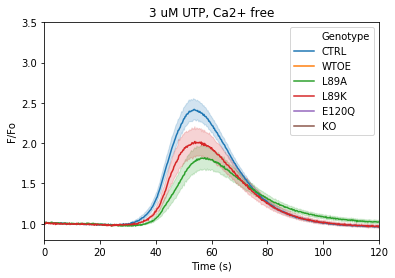

In [7]:
ax = sns.lineplot(x="Time (s)", y="F/Fo", hue="Genotype", ci=95, data=total_data, hue_order = ["CTRL", "WTOE", "L89A", "L89K", "E120Q", "KO"]).set_title('3 uM UTP, Ca2+ free')
fig = ax.get_figure()
fig.savefig("total_data")
plt.xlim(0, 120)
plt.ylim(0.8, 3.5)
plt.show()
fig = ax.get_figure()
fig.savefig("total_data_zoom")